In [12]:
from SpinTools.spinhamiltonian import spinhamiltonian as sh
import numpy as np

ham = sh.SpinHamiltonian("Bi")

Bz = ham.get_field_sweep(bmin=0,bmax=100,bnum=100)
energy = ham.calculate_energy(Bz)

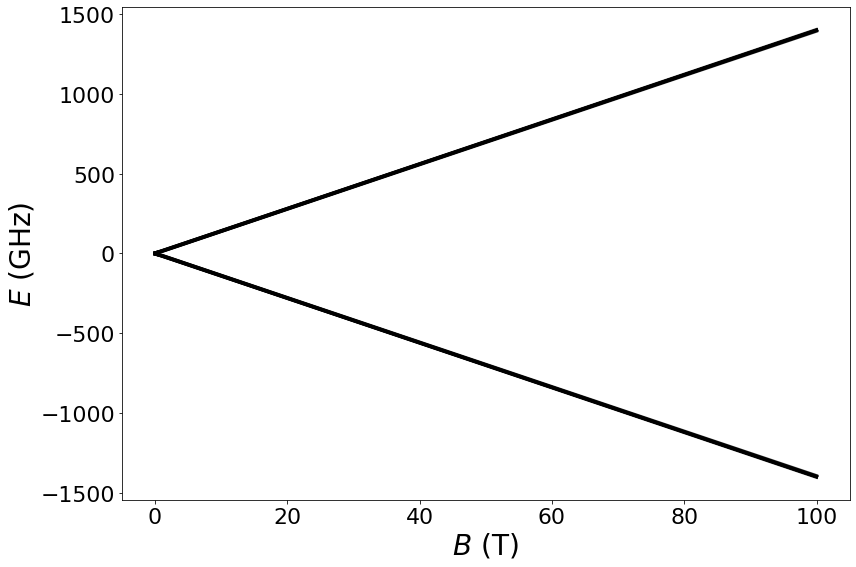

In [13]:
from matplotlib import pyplot as plt

plt.figure(figsize=(12,8))
plt.plot(Bz, energy,'k',alpha=.7)
plt.xlabel('$B$ (T)')
plt.ylabel('$E$ (GHz)')
plt.tight_layout()
plt.show()

In [3]:
# Hperturb = ham.electron_zeeman([0,0,1])

# np.set_printoptions(suppress=False, precision=3)

# # Hn = np.zeros((4,4),dtype=int)
# Hn = []

# for i in range(len(Hperturb)):
#     for j in range(len(Hperturb)):
#         Hn.append(estates[i].conjugate() *  Hperturb * estates[j])

In [ ]:
np.set_printoptions(suppress=False,precision=3)
import pdb; pdb.set_trace()
Es = ham.FGR_transitions(Bz, B_drive = [0,0,1])

--Return--
> <ipython-input-4-8e57ba844cb6>(2)<module>()->None
-> import pdb; pdb.set_trace()
(Pdb) next
> /Users/garethjones/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py(3299)run_code()
-> sys.excepthook = old_excepthook


In [19]:
Es[0]

array([array([0., 0., 0., 0.]), 1.0553576835885678e+49,
       array([-0.000e+00,  0.000e+00,  0.000e+00,  2.278e+48]),
       array([-0.000e+00,  0.000e+00,  0.000e+00,  2.278e+48])],
      dtype=object)

In [1]:
def FGR_transitions(eigvec,species,B_drive = [1,0,0]):
    MI = M(species[0])
    (Ix,Iy,Iz) = ang_mo_op(species[0])
    (Ixb,Iyb,Izb) = (enlarge_I(Ix,MI),enlarge_I(Iy,MI),enlarge_I(Iz,MI))
    
    (Sx,Sy,Sz) = ang_mo_op(species[1])
    (Sxb,Syb,Szb) = (enlarge_S(MI,Sx),enlarge_S(MI,Sy),enlarge_S(MI,Sz))
    
    Es,gammas,nm = [],[],[]
    
    H_drive = Zeeman(species[3],species[2],B_drive,Ixb,Iyb,Izb,Sxb,Syb,Szb)
    length = len(np.squeeze(np.asarray(eigvec[0][0,:])))
    
    for n in range(length):
        i = np.squeeze(np.asarray(eigvec[0][:,n]))
        for m in range(n+1,len(i)):
            f = np.squeeze(np.asarray(eigvec[0][:,m]))
            gamma = 1e24*np.abs(np.matmul(f,np.squeeze(np.asarray(np.matmul(H_drive,i)))))
            
            
            if gamma > 0 :
                Ef = np.real(eigvec[1][m])/h/1E9
                Ei = np.real(eigvec[1][n])/h/1E9
                E=(np.abs(Ef-Ei))
                Es.append([E,gamma,Ef,Ei])
                #print(Ef,Ei)
    
    Es = (np.array(Es))
    #print(Es[:,1].min())
    Es = Es[Es[:,0].argsort()]
    return(Es[:,0],Es[:,1],Es[:,2],Es[:,3]) 

In [2]:
from SpinTools.qmech import qmech as qmech

qm = qmech.Qmech()
S = qm.angular_momentum(0.5)
I = qm.angular_momentum(4.5)

# H_drive = Zeeman(species[3],species[2],B_drive,Ixb,Iyb,Izb,Sxb,Syb,Szb)
H_drive = ham.electron_zeeman([1,0,0])
length = len(np.squeeze(np.asarray(energy[0])))
    
for n in range(length):
    i = np.squeeze(np.asarray(energy[0][n]))
    for m in range(n+1,len(i)):
        f = np.squeeze(np.asarray(eigvec[0][m]))
#         gamma = 1e24*np.abs(np.matmul(f,np.squeeze(np.asarray(np.matmul(H_drive,i)))))
            
            
#             if gamma > 0 :
#                 Ef = np.real(eigvec[1][m])/h/1E9
#                 Ei = np.real(eigvec[1][n])/h/1E9
#                 E=(np.abs(Ef-Ei))
#                 Es.append([E,gamma,Ef,Ei])
#                 #print(Ef,Ei)
    
#     Es = (np.array(Es))
#     #print(Es[:,1].min())
#     Es = Es[Es[:,0].argsort()]
#     return(Es[:,0],Es[:,1],Es[:,2],Es[:,3]) 


NameError: name 'ham' is not defined